In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import yaml

In [3]:
import os

In [4]:
DIR = "../multirun/2020-06-06/20-39-27/"

In [19]:
runs = sorted(os.listdir(DIR))
runs

['a2c_0',
 'a2c_3crnn_4',
 'a2c_3rnn_2',
 'a2c_crnn_3',
 'a2c_rnn_1',
 'ppo_3crnn_6',
 'ppo_3rnn_7',
 'ppo_5',
 'ppo_crnn_8',
 'ppo_rnn_9']

In [20]:
dfs = {}
for run in runs:
    f_eval = DIR + run + "/eval.csv"
    f_train = DIR + run + "/train.csv"    
    df_run = pd.read_csv(f_train)
    dfs[run] = df_run

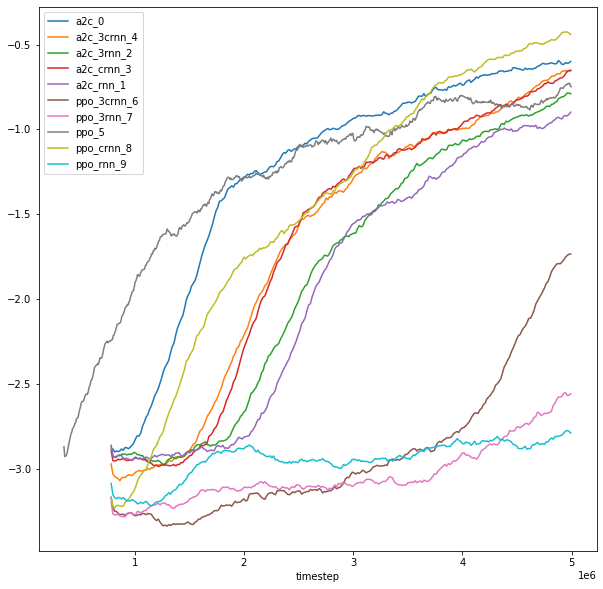

In [24]:
ax = None
target_var = "episode_reward"
# target_var = "loss_entropy"
# target_var = "fps"
# target_var = "episode"
for key, df in dfs.items():
    df = df.set_index("timestep")[target_var]
    df = df.rolling(50).mean()
    ax = df.reset_index().plot(x="timestep", y=target_var, label=key, ax=ax, figsize=(10,10))

In [13]:
dfs["a2c_0"]

,duration,episode,episode_reward,fps,loss_actor,loss_critic,loss_entropy,step,timestep,value
0,0.028652,51.0,-2.224667,2792.154043,-0.002708,0.000229,1.382373,200,16080.0,-0.791510
1,0.027617,109.0,-2.580667,2896.818841,-0.002597,0.000078,1.384228,400,32080.0,-0.793630
2,0.025098,169.0,-2.537667,3187.554694,-0.005616,0.000194,1.386262,600,48080.0,-0.569974
3,0.025061,223.0,-2.709667,3192.164011,-0.015975,0.000198,1.385983,800,64080.0,-0.550698
4,0.026812,277.0,-3.165333,2983.730104,0.029751,0.019947,1.382689,1000,80080.0,-0.632533
...,...,...,...,...,...,...,...,...,...,...
307,0.033139,49629.0,-0.686000,2414.057383,-0.007763,0.002599,1.077421,61600,4928080.0,-0.425911
308,0.029528,49982.0,-0.208667,2709.258060,-0.014862,0.003216,1.032298,61800,4944080.0,-0.316061
309,0.032646,50285.0,-0.698000,2450.498580,-0.001240,0.003238,1.182583,62000,4960080.0,-0.500906
310,0.036443,50600.0,-0.538000,2195.223615,0.009862,0.008014,1.060362,62200,4976080.0,-0.289061
